## Simular y visualizar

En este cuaderno se explica como lanzar una simulación desde PyHelios y como visualizar su resultado.

In [1]:
# Configurar entorno Jupyter
%config Completer.use_jedi = False

# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
from datetime import datetime

# Importar pyhelios
PYHELIOS_LIB_PATH = '/home/uadmin/git/helios/cmake-build-release'
HELIOS_PATH = '/home/uadmin/git/helios'
sys.path.append(PYHELIOS_LIB_PATH)
sys.path.append(HELIOS_PATH)
if os.getcwd().endswith('pyhelios'):
    os.chdir(os.path.dirname(os.getcwd()))
import pyhelios

### Cargar especificación XML De la simuación

Utilizando la utilidad `SimulationBuilder` puede cargarse una simulación base partiendo de la especificación XML. Para ello pueden considerarse los siguientes tres argumentos de entrada para el constructor:

1. Ruta al archivo XML que especifica la simulación (survey).
2. Ruta al directorio donde se encuentra los activos (assets) del simulador.
3. Ruta donde se desea que se escriban los archivos generados por el simulador.

In [2]:
# Cargar simulación TLS básica
root_dir = os.getcwd()
out_dir = os.path.join(root_dir, 'output/pyhelios/')
sim_builder = pyhelios.SimulationBuilder(
    os.path.join(root_dir, 'helios_basico/tls/base/simulacion_tls_basica.xml'),
    os.path.join(root_dir, 'helios_asset/'),
    out_dir
)

# Configurar las nubes sintéticas para que tengan formato LAZ (LAS comprimido)
sim_builder.setLasOutput(True)
sim_builder.setZipOutput(True)

# Construir la simulación
sim = sim_builder.build()

# Ejecutar la simulación
start = time.perf_counter()
sim.start()

# Esperar a que termine de ejecutarse la simulación
out = sim.join()  
end = time.perf_counter()

# Extraer información de interés
P, T = pyhelios.outputToNumpy(out)  # Nube y trayectoria como arrays de numpy
print(f'La simulación se ha ejecutado en {end-start:.3f} segundos.')
print(
    'La simulación ha generado un total de {m_nube} puntos.\n'
    'Se han registrado un total de {m_trayectoria} puntos de trayectoria.'
    .format(
        m_nube=P.shape[0],
        m_trayectoria=T.shape[0]
    )
)
print('Se han generado las siguientes nubes:')
for path in out.outpaths:
    print(f'\t{path}')

surveyPath: "/home/uadmin/git/vlsdl_workshop2024/helios_basico/tls/base/simulacion_tls_basica.xml"
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 1.0369255030018394 seconds
La simulación se ha ejecutado en 2.160 segundos.
La simulación ha generado un total de 482823 puntos.
Se han registrado un total de 22 puntos de trayectoria.
Se han generado las siguientes nubes:
	/home/uadmin/git/vlsdl_workshop2024/output/pyhelios//tls_basico/2024-09-22_18-16-58/leg000_points.laz
	/home/uadmin/git/vlsdl_workshop2024/output/pyhelios//tls_basico/2024-09-22_18-16-58/leg001_points.laz


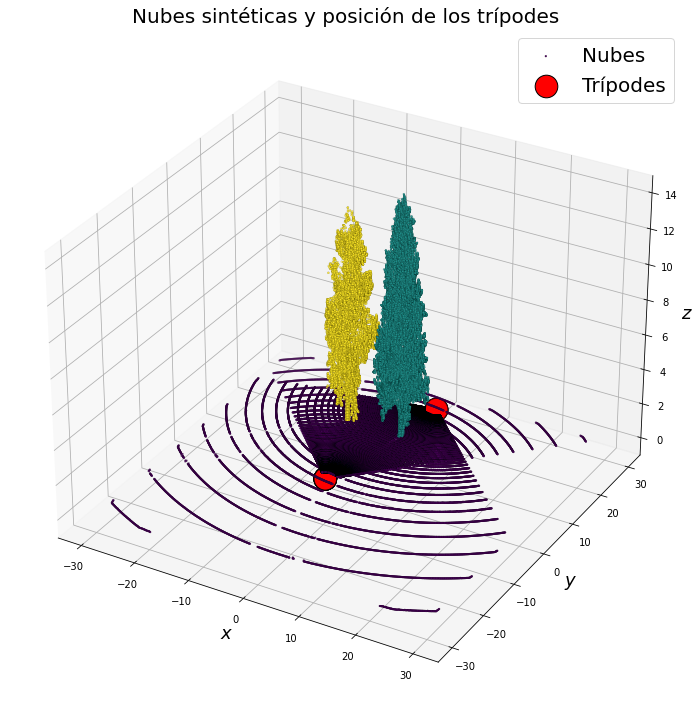

In [3]:
# Preparar contexto de graficación
fig = plt.figure(figsize=(16, 10))

# Graficar puntos de las nubes sintéticas
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(P[:, 0], P[:, 1], P[:, 2], c=P[:, 14], s=4, edgecolor='black', linewidths=0.1, label='Nubes')

# Graficar trípodes como un gran punto rojo
ax.scatter(T[:, 0], T[:, 1], T[:, 2], s=512, c='red', edgecolor='black', linewidths=1, label='Trípodes')

# Configurar figura
ax.set_title('Nubes sintéticas y posición de los trípodes', fontsize=20)
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
ax.set_zlabel('$z$', fontsize=18)
fig.tight_layout()

# Mostrar gráfico
plt.show()

### Ejercicio 1

Lanzar la simulación base de ALS interpolado del bloque HELIOS básico tal que:

1. La salida se exporte en formato LAS (no comprimido).

2. La simulación se ejecute utilizando como máximo dos hilos. *Pista: Utilizar el setter* `setNumThreads` *del objeto* `SimulationBuilder` *.*

3. Una vez terminada se visualize un gráfico que muestre la salida de la nube con todos los puntos de color rojo con el borde negro y la trayectoria de la plataforma aérea coloreada por tiempo. *Pista: El tiempo GPS es la cuarta columna de la matriz de trayectoria.* 

In [4]:
# TODO : Codifíquese aquí la respuesta al Ejercicio 1

### Ejercicio 2

Lanzar la solución del ejercicio 3 de MLS interpolado (bloque HELIOS básico) tal que:

1. La salida se exporte en formato LAZ (LAS comprimido).
2. Derivar la velocidad a partir de los puntos de trayectoria. *Pista: Utilizar un método de diferencias finitas para aproximar la velocidad a partir de la relación entre la distancia y el tiempo entre puntos consecutivos.*
3. Graficar la trayectoria en el plano coloreando los puntos según su velocidad.
4. Graficar la velocidad como función del tiempo considerando los datos de trayectoria. *Pista: El tiempo GPS se da como "GPS Time of week" en nanosegundos. Convertirlo a segundos hará más comprensible la graficación.*

In [5]:
# TODO : Codifíquese aquí la respuesta al Ejercicio 2

### Solución : Ejercicio 1

surveyPath: "/home/uadmin/git/vlsdl_workshop2024/helios_basico/als_interpolado/base/simulacion_als_interpolado.xml"
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 0.010137542998563731 seconds
La simulación se ha ejecutado en 5.792 segundos.
La simulación ha generado un total de 1791607 puntos.
Se han registrado un total de 597 puntos de trayectoria.
Se han generado las siguientes nubes:
	/home/uadmin/git/vlsdl_workshop2024/output/pyhelios//als_interpolado/2024-09-22_18-17-05/leg000_points.las


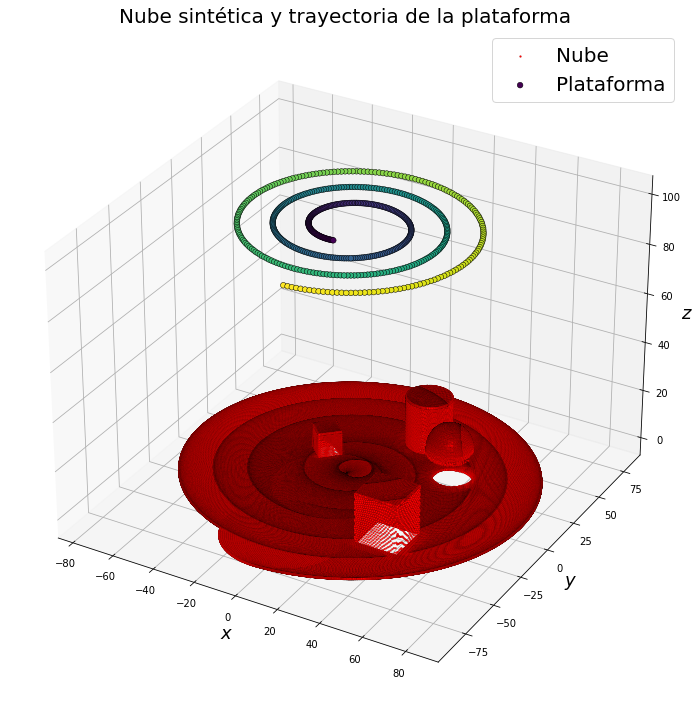

In [6]:
# Cargar simulación TLS básica
root_dir = os.getcwd()
out_dir = os.path.join(root_dir, 'output/pyhelios/')
sim_builder = pyhelios.SimulationBuilder(
    os.path.join(root_dir, 'helios_basico/als_interpolado/base/simulacion_als_interpolado.xml'),
    os.path.join(root_dir, 'helios_asset/'),
    out_dir
)

# Configurar las nubes sintéticas para que tengan formato LAZ (LAS comprimido)
sim_builder.setLasOutput(True)
sim_builder.setZipOutput(False)

# Limitar el número de hilos para la simulación a 2
sim_builder.setNumThreads(2)

# Construir la simulación
sim = sim_builder.build()

# Ejecutar la simulación
start = time.perf_counter()
sim.start()

# Esperar a que termine de ejecutarse la simulación
out = sim.join()  
end = time.perf_counter()

# Extraer información de interés
P, T = pyhelios.outputToNumpy(out)  # Nube y trayectoria como arrays de numpy
print(f'La simulación se ha ejecutado en {end-start:.3f} segundos.')
print(
    'La simulación ha generado un total de {m_nube} puntos.\n'
    'Se han registrado un total de {m_trayectoria} puntos de trayectoria.'
    .format(
        m_nube=P.shape[0],
        m_trayectoria=T.shape[0]
    )
)
print('Se han generado las siguientes nubes:')
for path in out.outpaths:
    print(f'\t{path}')
    

# Preparar contexto de graficación
fig = plt.figure(figsize=(16, 10))

# Graficar puntos de las nubes sintéticas
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(P[:, 0], P[:, 1], P[:, 2], c='red', s=4, label='Nube', edgecolor='black', linewidths=0.1)

# Graficar trayectoria
ax.scatter(
    T[:, 0], T[:, 1], T[:, 2],
    s=32, c=T[:, 3], edgecolor='black', linewidths=0.5, label='Plataforma', depthshade=False
)

# Configurar figura
ax.set_title('Nube sintética y trayectoria de la plataforma', fontsize=20)
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
ax.set_zlabel('$z$', fontsize=18)
fig.tight_layout()

# Mostrar gráfico
plt.show()

### Solución : Ejercicio 2

surveyPath: "/home/uadmin/git/vlsdl_workshop2024/helios_basico/mls_interpolado/soluciones/ejercicio3/simulacion_mls_interpolado_ejercicio3.xml"
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 4.679985144997772 seconds
La simulación se ha ejecutado en 2.566 segundos.
La simulación ha generado un total de 468651 puntos.
Se han registrado un total de 786 puntos de trayectoria.
Se han generado las siguientes nubes:
	/home/uadmin/git/vlsdl_workshop2024/output/pyhelios//mls_interpolado_ejercicio3/2024-09-22_18-17-30/leg000_points.laz


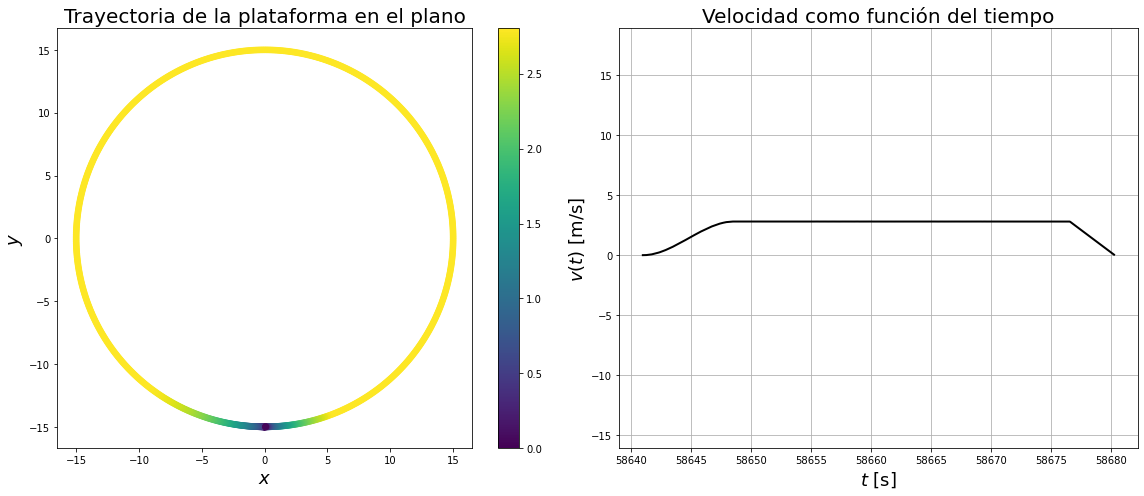

In [7]:
# Cargar simulación TLS básica
root_dir = os.getcwd()
out_dir = os.path.join(root_dir, 'output/pyhelios/')
sim_builder = pyhelios.SimulationBuilder(
    os.path.join(
        root_dir,
        'helios_basico/mls_interpolado/soluciones/ejercicio3/simulacion_mls_interpolado_ejercicio3.xml'
    ),
    os.path.join(root_dir, 'helios_asset/'),
    out_dir
)

# Configurar las nubes sintéticas para que tengan formato LAZ (LAS comprimido)
sim_builder.setLasOutput(True)
sim_builder.setZipOutput(True)

# Construir la simulación
sim = sim_builder.build()

# Ejecutar la simulación
start = time.perf_counter()
sim.start()

# Esperar a que termine de ejecutarse la simulación
out = sim.join()  
end = time.perf_counter()

# Extraer información de interés
P, T = pyhelios.outputToNumpy(out)  # Nube y trayectoria como arrays de numpy
print(f'La simulación se ha ejecutado en {end-start:.3f} segundos.')
print(
    'La simulación ha generado un total de {m_nube} puntos.\n'
    'Se han registrado un total de {m_trayectoria} puntos de trayectoria.'
    .format(
        m_nube=P.shape[0],
        m_trayectoria=T.shape[0]
    )
)
print('Se han generado las siguientes nubes:')
for path in out.outpaths:
    print(f'\t{path}')
    
# Calcular velocidades de la trayectoria por diferencias fintias (asumir 0 para el primer punto).
t = T[:, 3]*1e-9
Dt = np.diff(t)
X = T[:, :3]
Dx = np.linalg.norm(X[1:] - X[:-1], axis=1)
v = np.concatenate([[0], Dx/Dt])
    

# Preparar contexto de graficación
fig = plt.figure(figsize=(16, 7))

# Graficar trayectoria en el plano
ax = fig.add_subplot(1, 2, 1)
plot = ax.scatter(T[:, 0], T[:, 1], s=32, c=v)
ax.set_title('Trayectoria de la plataforma en el plano', fontsize=20)
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
ax.axis('equal')
fig.colorbar(plot, ax=ax)

# Graficar velocidad como función del tiempo
ax = fig.add_subplot(1, 2, 2)
ax.plot(t, v, lw=2, color='black')
ax.set_title('Velocidad como función del tiempo', fontsize=20)
ax.set_xlabel('$t$ [s]', fontsize=18)
ax.set_ylabel('$v(t)$ [m/s]', fontsize=18)
ax.axis('equal')
ax.grid('both')
ax.set_axisbelow(True)

# Configurar figura
fig.tight_layout()

# Mostrar gráfico
plt.show()